In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
transaction_data = pd.read_csv("data/transaction_dataset.csv")
print(transaction_data.shape)
transaction_data = transaction_data.dropna()
categorical_data = transaction_data[[" ERC20 most sent token type", " ERC20_most_rec_token_type"]]
num_dummy_vars = len(categorical_data[" ERC20 most sent token type"].unique()) + len(categorical_data[" ERC20_most_rec_token_type"].unique())
print(num_dummy_vars)
categorical_data

(9841, 51)
772


,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,None,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
...,...,...
9832,,Blockwell say NOTSAFU
9836,,GSENetwork
9837,,Blockwell say NOTSAFU
9838,,Free BOB Tokens - BobsRepair.com


In [4]:
fraud_labels = transaction_data['FLAG']
#select columns 4 and above
features = transaction_data.iloc[:,4:-2]
display(features.describe())

#one hot encode categorical features ERC20 most sent token time and ERC20 most received token time
# features = pd.get_dummies(features, columns=[' ERC20 most sent token type', ' ERC20_most_rec_token_type'])

display(features)

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,8981.000000,8981.000000,8.981000e+03,8981.000000,8981.000000,8981.000000,8981.000000,8981.000000,8981.000000,8981.000000,...,8.981000e+03,8.981000e+03,8.981000e+03,8.981000e+03,8.981000e+03,8981.0,8981.0,8981.0,8981.000000,8981.000000
mean,5385.044197,8262.279914,2.342820e+05,122.359091,172.650150,4.068812,31.251420,26.826634,47.456209,571.657857,...,1.255114e+08,4.336482e+06,1.178169e+04,1.308093e+07,6.340198e+06,0.0,0.0,0.0,1.386260,4.818283
std,22149.013489,23416.048804,3.308771e+05,769.388029,960.891404,148.059251,301.747425,257.397328,336.858127,13616.372499,...,1.055557e+10,2.144761e+08,1.055384e+06,1.181940e+09,5.924963e+08,0.0,0.0,0.0,6.746451,16.696803
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,3.211200e+02,1.000000,2.000000,0.000000,1.000000,1.000000,0.003000,1.018356,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,21.510000,753.520000,6.905013e+04,3.000000,5.000000,0.000000,2.000000,2.000000,0.100000,8.360000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,744.000000,5868.390000,3.228930e+05,13.000000,30.000000,0.000000,5.000000,3.000000,3.150000,78.798212,...,9.900000e+01,2.809250e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,6711.000000,10000.000000,800000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,...,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0
1,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,...,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0
2,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,...,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0
3,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,...,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0
4,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,...,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,...,1.337000e+01,6.685000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0
9836,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,12.000000,...,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0
9837,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,...,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0
9838,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,21.310000,...,1.500000e+03,300.693901,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Number of features: " + str(len(features.columns)))

X_train, X_test, y_train, y_test = train_test_split(features, fraud_labels, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=1000, random_state=42)

rf.fit(X_train, y_train)

rf_predictions = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, rf_predictions)

print(accuracy_rf)

Number of features: 45
0.9760712298274903


In [6]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

xgb_predictions = xgb_clf.predict(X_test)

accuracy_xgb = accuracy_score(y_test, xgb_predictions)

print(accuracy_xgb)

0.9833055091819699


In [7]:
from sklearn.feature_selection import SelectFromModel

sel_rf = SelectFromModel(rf)
sel_rf.fit(X_train, y_train)

sel_xgb = SelectFromModel(xgb_clf)
sel_xgb.fit(X_train, y_train)

sel_rf.get_support()
sel_xgb.get_support()

selected_feat_rf= X_train.columns[(sel_rf.get_support())]
selected_feat_xgb= X_train.columns[(sel_xgb.get_support())]

print("No. of Selected Features by Random Forest: ", len(selected_feat_rf))
print("No. of Selected Features by XGBoost: ", len(selected_feat_xgb))

print("RF Selected Features: ", selected_feat_rf)
print("XGBoost Selected Features: ", selected_feat_xgb)

No. of Selected Features by Random Forest:  15
No. of Selected Features by XGBoost:  10
RF Selected Features:  Index(['Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Received Tnx',
       'Unique Received From Addresses', 'min val sent',
       'total transactions (including tnx to create contract',
       'total ether received', ' Total ERC20 tnxs',
       ' ERC20 total Ether received', ' ERC20 uniq rec addr',
       ' ERC20 uniq rec contract addr', ' ERC20 min val rec',
       ' ERC20 max val rec', ' ERC20 avg val rec',
       ' ERC20 uniq rec token name'],
      dtype='object')
XGBoost Selected Features:  Index(['Time Diff between first and last (Mins)', 'Sent tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'total transactions (including tnx to create contract',
       'total ether received', ' Total ERC20 tnxs', ' ERC20 total ether sent',
       ' ERC20 min val rec', ' ERC20 uniq sent token name'],
      dtype=

<Axes: title={'center': 'XGBoost Feature Importance'}>

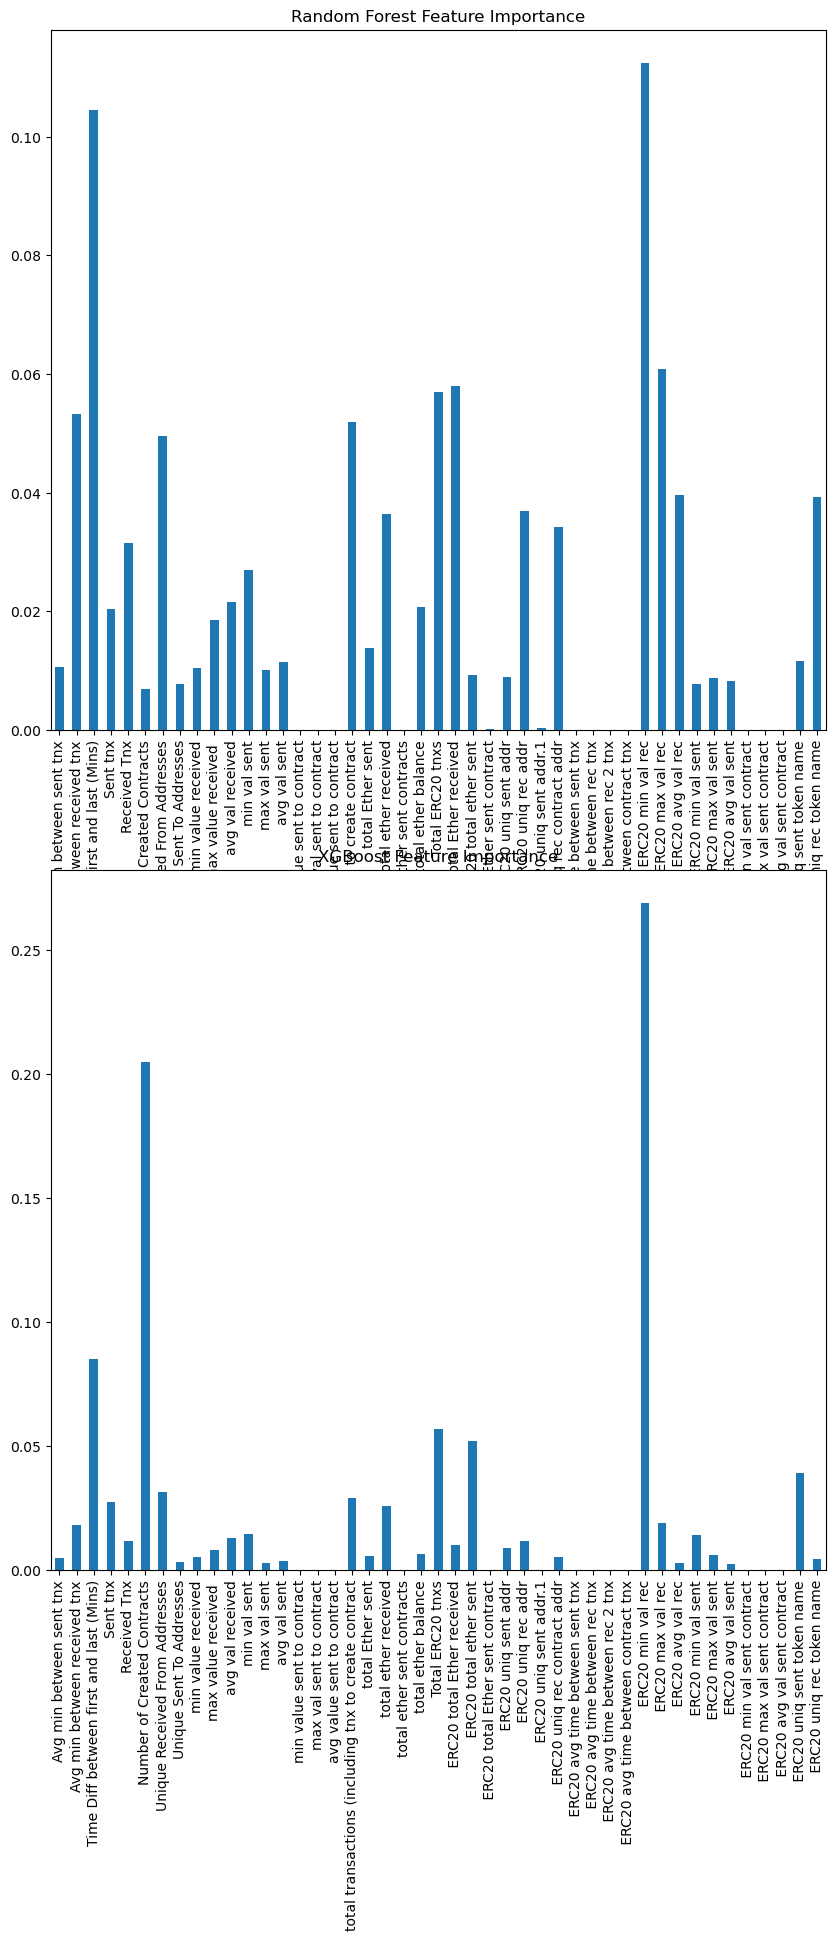

In [8]:
# pd.Series(rf.feature_importances_, index=X_train.columns).plot.bar(figsize=(20,10))

fig, ax = plt.subplots(2,figsize=(20,60))
pd.Series(sel_rf.estimator_.feature_importances_, index=X_train.columns).plot.bar(figsize=(10,20), ax=ax[0], title="Random Forest Feature Importance")
pd.Series(sel_xgb.estimator_.feature_importances_, index=X_train.columns).plot.bar(figsize=(10,20), ax=ax[1], title="XGBoost Feature Importance")

In [9]:
rf_sub_features = features[selected_feat_rf]
xgb_sub_features = features[selected_feat_xgb]

X_rfsub_train, X_rfsub_test, y_rfsub_train, y_rfsub_test = train_test_split(rf_sub_features, fraud_labels, test_size=0.2, random_state=42)
X_xgbsub_train, X_xgbsub_test, y_xgbsub_train, y_xgbsub_test = train_test_split(xgb_sub_features, fraud_labels, test_size=0.2, random_state=42)

rf_sub = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_sub.fit(X_rfsub_train, y_rfsub_train)
rf_sub_predictions = rf_sub.predict(X_rfsub_test)
accuracy_rf_sub = accuracy_score(y_rfsub_test, rf_sub_predictions)
print("Random Forest All Features Accuracy: " + str(accuracy_rf))
print("Random Forest Sub Features Accuracy: " + str(accuracy_rf_sub))

xgb_sub = XGBClassifier()
xgb_sub.fit(X_xgbsub_train, y_xgbsub_train)
xgb_sub_predictions = xgb_sub.predict(X_xgbsub_test)
accuracy_xgb_sub = accuracy_score(y_xgbsub_test, xgb_sub_predictions)
print("XGBoost All Features Accuracy: " + str(accuracy_xgb))
print("XGBoost Sub Features Accuracy: " + str(accuracy_xgb_sub))


Random Forest All Features Accuracy: 0.9760712298274903
Random Forest Sub Features Accuracy: 0.9777406789092933
XGBoost All Features Accuracy: 0.9833055091819699
XGBoost Sub Features Accuracy: 0.9827490261547023


In [15]:
rf_sub_f1 = f1_score(y_rfsub_test, rf_sub_predictions)
rf_sub_recall = recall_score(y_rfsub_test, rf_sub_predictions)
rf_sub_precision = precision_score(y_rfsub_test, rf_sub_predictions)

xgb_sub_f1 = f1_score(y_xgbsub_test, xgb_sub_predictions)
xgb_sub_recall = recall_score(y_xgbsub_test, xgb_sub_predictions)
xgb_sub_precision = precision_score(y_xgbsub_test, xgb_sub_predictions)

print("Random Forest Sub Features F1 Score: " + str(rf_sub_f1))
print("Random Forest Sub Features Recall Score: " + str(rf_sub_recall))
print("Random Forest Sub Features Precision Score: " + str(rf_sub_precision))

print("XGBoost Sub Features F1 Score: " + str(xgb_sub_f1))
print("XGBoost Sub Features Recall Score: " + str(xgb_sub_recall))
print("XGBoost Sub Features Precision Score: " + str(xgb_sub_precision))

Random Forest Sub Features F1 Score: 0.9233716475095787
Random Forest Sub Features Recall Score: 0.8925925925925926
Random Forest Sub Features Precision Score: 0.9563492063492064
XGBoost Sub Features F1 Score: 0.9418386491557224
XGBoost Sub Features Recall Score: 0.9296296296296296
XGBoost Sub Features Precision Score: 0.9543726235741445


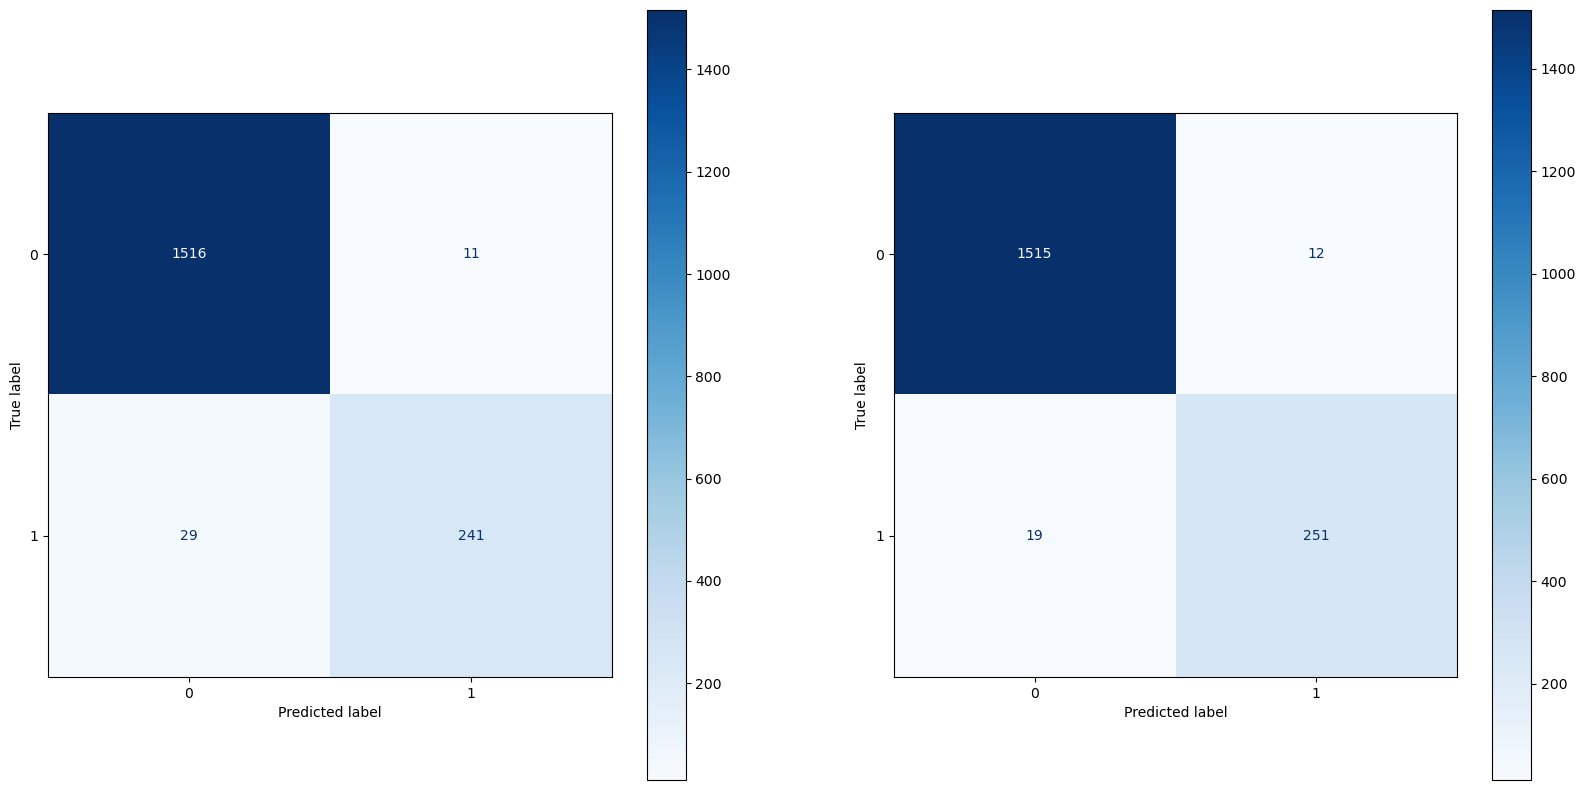

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

rf_sub_cm = confusion_matrix(y_rfsub_test, rf_sub_predictions)
xgb_sub_cm = confusion_matrix(y_xgbsub_test, xgb_sub_predictions)

fig, ax = plt.subplots(1,2,figsize=(20,10))
rf_sub_cm_display = ConfusionMatrixDisplay(confusion_matrix=rf_sub_cm, display_labels=rf_sub.classes_)
xgb_sub_cm_display = ConfusionMatrixDisplay(confusion_matrix=xgb_sub_cm, display_labels=xgb_sub.classes_)
ax[0] = rf_sub_cm_display.plot(ax=ax[0], cmap=plt.cm.Blues)
ax[1] = xgb_sub_cm_display.plot(ax=ax[1], cmap=plt.cm.Blues)
plt.show()

In [39]:
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, GridSearchCV

kf = KFold(n_splits=10, random_state=42, shuffle=True)

imba_rf_pipeline = make_pipeline(SMOTE(random_state=42), RandomForestClassifier())
imba_xgb_pipeline = make_pipeline(SMOTE(random_state=42), XGBClassifier())



In [56]:
params = {
    'n_estimators': [800, 1000, 1200],
    'max_depth': [4, 6, 8, 10],
    'random_state': [42]
}

new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_imba_rf = GridSearchCV(imba_rf_pipeline, param_grid=new_params, cv=kf, scoring='f1',
                        return_train_score=True)
grid_imba_rf.fit(X_rfsub_train, y_rfsub_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [4, 6, 8, 10],
                         'randomforestclassifier__n_estimators': [800, 1000,
                                                                  1200],
                         'randomforestclassifier__random_state': [42]},
             return_train_score=True, scoring='f1')

In [58]:
print("Best Parameters {}".format(grid_imba_rf.best_params_))
print("Best Score {}".format(grid_imba_rf.best_score_))

Best Parameters {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 1200, 'randomforestclassifier__random_state': 42}
Best Score 0.9250724985444542


In [54]:
params = {
    'eta' : [0.01, 0.1, 0.2, 0.3, 0.4],
    'max_depth': [4, 6, 8, 10],
    'random_state': [42]
}

new_params = {'xgbclassifier__' + key: params[key] for key in params}
grid_imba_xgb = GridSearchCV(imba_xgb_pipeline, param_grid=new_params, cv=kf, scoring='f1',
                        return_train_score=True)
grid_imba_xgb.fit(X_xgbsub_train, y_xgbsub_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=No...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__eta': [0.01, 0.1, 0.2, 0.3, 0.4],
                         'xgbclassifier__max_depth': [4, 6, 8, 10],
                         'xgbclassifier__random_state': [42]},
             return_train_score=True, scoring='f1')

In [55]:
print("Best Parameters {}".format(grid_imba_xgb.best_params_))
print("Best Score {}".format(grid_imba_xgb.best_score_))

Best Parameters {'xgbclassifier__eta': 0.4, 'xgbclassifier__max_depth': 4, 'xgbclassifier__random_state': 42}
Best Score 0.9403966279409076
